In [1]:
##Stock Analysis with Scikit-Learn/Pandas

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2018, 12, 31)

#Extract Apple Stock Prices from 2008 to 2018
df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.800995
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,38.322155
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,38.073456
2018-12-28,39.630001,38.637501,39.375000,39.057499,169165600.0,38.092960
2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.461140


In [3]:
#Let's Compare Apple, Microsoft, IBM, Google, and GE

dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2008-01-02,5.993858,23.637148,341.315674,70.470428,26.256372
2008-01-03,5.996627,23.662868,341.385406,70.611824,26.368216
2008-01-04,5.538875,23.174173,327.273285,68.074089,25.630169
2008-01-07,5.464737,23.264196,323.412781,67.347076,25.801632
2008-01-08,5.268161,22.762650,314.660583,65.691162,24.936844
...,...,...,...,...,...
2018-12-24,35.800995,6.593773,976.219971,96.245712,91.575211
2018-12-26,38.322155,7.041616,1039.459961,99.663574,97.830696
2018-12-27,38.073456,6.927274,1043.880005,101.801971,98.433876


In [4]:
#Analyze by using percent change and correlation
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2008-01-02,5.993858,23.637148,341.315674,70.470428,26.256372
2008-01-03,5.996627,23.662868,341.385406,70.611824,26.368216
2008-01-04,5.538875,23.174173,327.273285,68.074089,25.630169
2008-01-07,5.464737,23.264196,323.412781,67.347076,25.801632
2008-01-08,5.268161,22.762650,314.660583,65.691162,24.936844
...,...,...,...,...,...
2018-12-24,35.800995,6.593773,976.219971,96.245712,91.575211
2018-12-26,38.322155,7.041616,1039.459961,99.663574,97.830696
2018-12-27,38.073456,6.927274,1043.880005,101.801971,98.433876


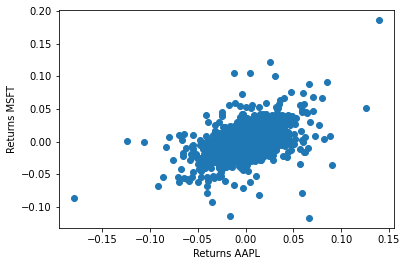

In [5]:
#Scatterplot to show Apple vs Microsoft return distibutions


plt.scatter(retscomp.AAPL, retscomp.MSFT)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns MSFT')
plt.show()

([<matplotlib.axis.YTick at 0x139e3d89df0>,
 [Text(0, 0, 'AAPL'),
  Text(0, 0, 'GE'),
  Text(0, 0, 'GOOG'),
  Text(0, 0, 'IBM'),
  Text(0, 0, 'MSFT')])

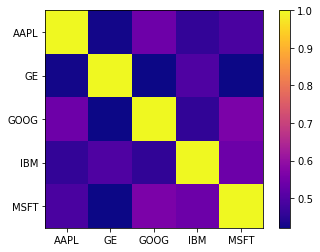

In [13]:
#Heat map to visualize the correlation ranges of all companies


plt.imshow(corr, cmap='plasma', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)